## receptiveness-homophily experiment

In [1]:
import pandas as pd

df = pd.read_csv('cluster-receptiveness-homophily.csv')

df.head()

,homophily,prop_covert,receptivity,timestep,trial_idx
0,0.0,0.52,0.0,0,0
1,0.0,0.48,0.0,1,1
2,0.0,0.51,0.0,2,2
3,0.0,0.46,0.0,3,3
4,0.0,0.47,0.0,4,4


/Users/mt/Library/Python/3.7/lib/python/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


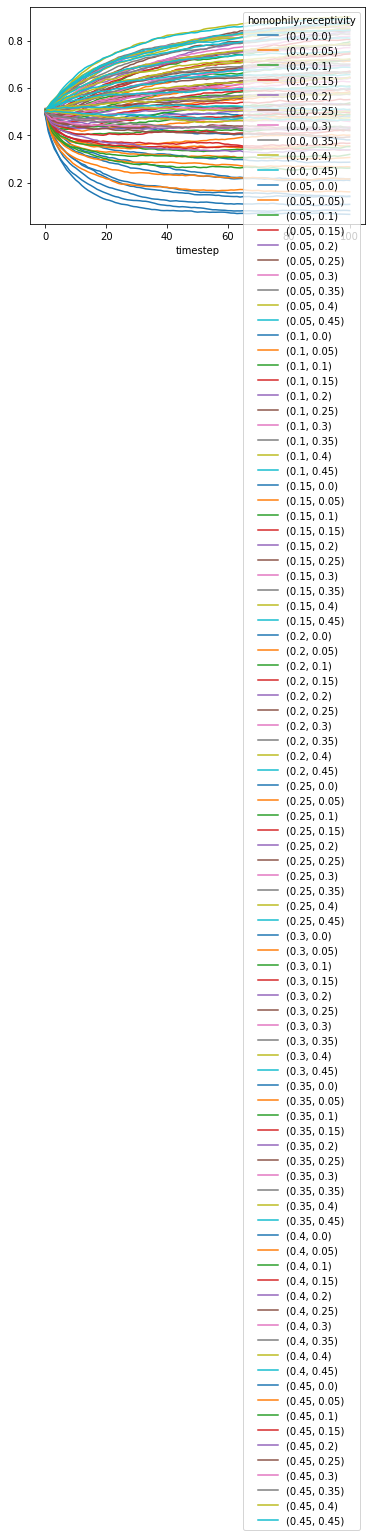

In [2]:
gb_mean = df.groupby(['homophily', 'receptivity', 'timestep']
                     )['prop_covert'].mean()

means = gb_mean.unstack(level=(0,1))

means.plot()

In [3]:
homophilies = [0.1, 0.25, 0.4]
receptivities = [0.1, 0.25, 0.4]

df_lim = df[df.homophily.isin(homophilies) & df.receptivity.isin(receptivities)]

In [4]:
df_lim.head()
len(df_lim)

90900

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


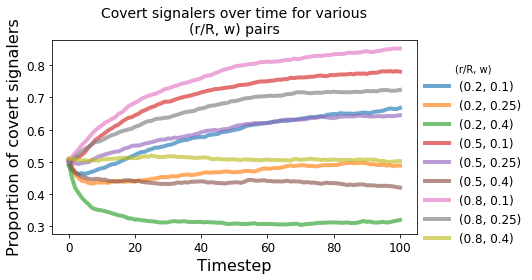

In [27]:
df_lim = df_lim = df[df.homophily.isin(homophilies) & df.receptivity.isin(receptivities)]
df_lim['receptivity'] = df_lim.receptivity / 0.5  

gb_mean = df_lim.groupby(['receptivity', 'homophily', 'timestep']
                     )['prop_covert'].mean()

# co

means = gb_mean.unstack(level=(0,1))


# plt.figure(figsize=(8, 4))
means.plot(lw=4, alpha=0.65, figsize=(7.5, 4))

plt.legend(bbox_to_anchor= (1.01, 0.9), ncol=1, title='(r/R, w)',
            borderaxespad=0, frameon=False, prop={'size': 12})
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel('Proportion of covert signalers', size=16)
plt.xlabel('Timestep', size=16)
plt.title('Covert signalers over time for various\n(r/R, w) pairs', size=14)
plt.savefig('/Users/mt/workspace/id-sig/reports/Figures/exampleMidrangeSeries.pdf')

Text(6.800000000000004, 0.5, 'Receptivity')

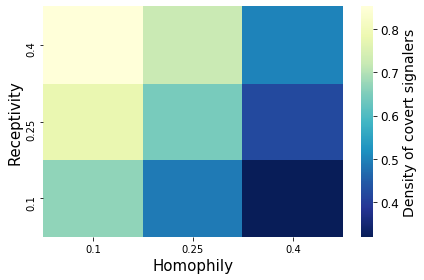

In [6]:
means.head()
means.index == 100
final_means = means[means.index == 100]

ax = sns.heatmap(final_means.stack(), cmap='YlGnBu_r',
                cbar_kws={'label': 'Density of covert signalers'})

# Set size of colorbar title.
ax.figure.axes[-1].yaxis.label.set_size(14)

# Set size of colorbar tick labels.
ax.collections[0].colorbar.ax.tick_params(labelsize=12)

# Clean up some other things.
ax.invert_yaxis()
ax.set_yticklabels(['0.1', '0.25', '0.4'])
ax.set_xlabel('Homophily', size=15)
ax.set_ylabel('Receptivity', size=15)

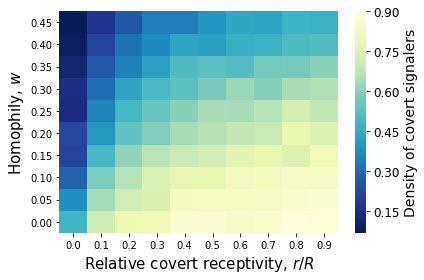

In [17]:
# Now that we know this works, let's scale up.

gb_mean = df.groupby(['receptivity', 'homophily', 'timestep']
                     )['prop_covert'].mean()

means = gb_mean.unstack(level=(0,1))

means.head()
means.index == 100
final_means = means[means.index == 100]

ax = sns.heatmap(final_means.stack(), cmap='YlGnBu_r',
                cbar_kws={'label': 'Density of covert signalers'})

# Set size of colorbar title.
ax.figure.axes[-1].yaxis.label.set_size(14)

# Set size of colorbar tick labels.
ax.collections[0].colorbar.ax.tick_params(labelsize=12)

# Clean up some other things.
ax.invert_yaxis()
# ax.set_yticklabels(['0.1', '0.25', '0.4'])
ax.set_ylabel('Homophily, $w$', size=15)
ax.set_xlabel('Relative covert receptivity, $r/R$', size=15)


relative_receptivity = df.receptivity.unique() / 0.5
relative_receptivity.sort()
ax.set_xticklabels(relative_receptivity)
ax.set_yticklabels([f'{y:.2f}' for y in np.arange(0, 0.46, 0.05)])

plt.savefig(
'/Users/mt/workspace/id-sig/reports/Figures/covertDensityVsReceptivityHomophily.pdf'
)

## Disliking penalty and homophily experiment

In [3]:
from id_signaling.experiment import trials_dislikepen_homophily

import pandas as pd

In [4]:
dislike_penalty = 0.15; homophily = 0.1;
n_trials=4; n_iter=50;
demo_1 = \
    trials_dislikepen_homophily(dislike_penalty, homophily, n_trials, n_iter)

dislike_penalty = 0.40; homophily = 0.1;
n_trials=4; n_iter=50;
demo_2 = \
    trials_dislikepen_homophily(dislike_penalty, homophily, n_trials, n_iter)

In [7]:
df_demo = pd.concat([demo_1, demo_2])

print(len(df_demo))

df_demo.head(20)

408


,timestep,trial_idx,dislike_penalty,homophily,prop_covert
0,0,0,0.15,0.1,0.53
1,1,1,0.15,0.1,0.53
2,2,2,0.15,0.1,0.56
3,3,3,0.15,0.1,0.58
4,4,0,0.15,0.1,0.64
5,5,1,0.15,0.1,0.67
6,6,2,0.15,0.1,0.69
7,7,3,0.15,0.1,0.71
8,8,0,0.15,0.1,0.74
9,9,1,0.15,0.1,0.73


Text(0.5, 1.0, 'Covert signalers over time for various\n($d=\\delta$, w) pairs')

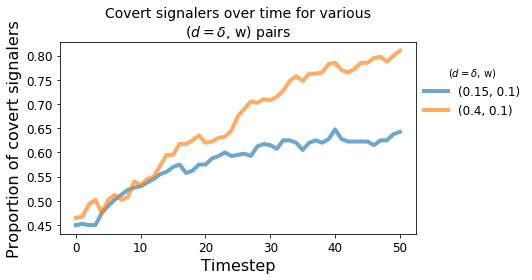

In [11]:
gb_mean = df_demo.groupby(
    ['dislike_penalty', 'homophily', 'timestep']
)['prop_covert'].mean()

means = gb_mean.unstack(level=(0,1))


# plt.figure(figsize=(8, 4))
means.plot(lw=4, alpha=0.65, figsize=(7.5, 4))

plt.legend(bbox_to_anchor= (1.01, 0.9), ncol=1, title='($d=\delta$, w)',
            borderaxespad=0, frameon=False, prop={'size': 12})
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel('Proportion of covert signalers', size=16)
plt.xlabel('Timestep', size=16)
plt.title('Covert signalers over time for various\n($d=\delta$, w) pairs', size=14)

In [ ]:
import pandas as pd


In [1]:
df = pd.read_csv('cluster-disliking-homophily.csv')
df.head()

,dislike_penalty,homophily,prop_covert,timestep,trial_idx
0,0.0,0.0,0.43,0,0
1,0.0,0.0,0.39,1,1
2,0.0,0.0,0.40,2,2
3,0.0,0.0,0.43,3,3
4,0.0,0.0,0.45,4,4


In [17]:
gb_mean = df.groupby(
    ['dislike_penalty', 'homophily', 'timestep']
)['prop_covert'].mean()

means = gb_mean.unstack(level=(0,1))

Text(0.5, 1.0, 'Covert signalers over time for various\n($d=\\delta$, w) pairs')

/Users/mt/Library/Python/3.7/lib/python/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


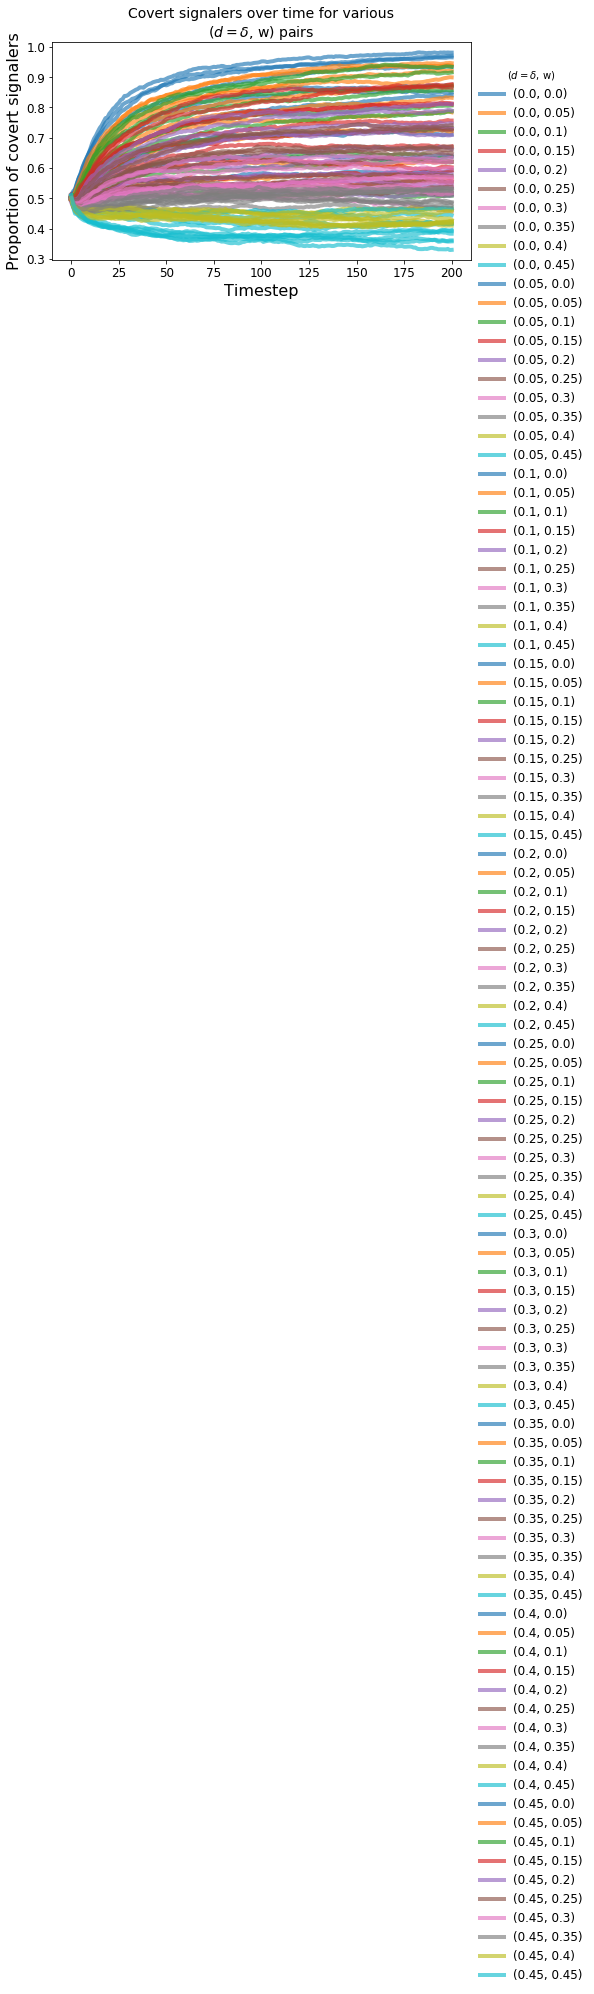

In [4]:
means.plot(lw=4, alpha=0.65, figsize=(7.5, 4))

plt.legend(bbox_to_anchor= (1.01, 0.9), ncol=1, title='($d=\delta$, w)',
            borderaxespad=0, frameon=False, prop={'size': 12})
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel('Proportion of covert signalers', size=16)
plt.xlabel('Timestep', size=16)
plt.title('Covert signalers over time for various\n($d=\delta$, w) pairs', size=14)

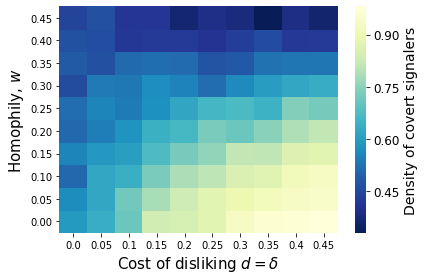

In [18]:
final_means = means[means.index == 200]

ax = sns.heatmap(final_means.stack(), cmap='YlGnBu_r',
                cbar_kws={'label': 'Density of covert signalers'})

# Set size of colorbar title.
ax.figure.axes[-1].yaxis.label.set_size(14)

# Set size of colorbar tick labels.
ax.collections[0].colorbar.ax.tick_params(labelsize=12)

# Clean up some other things.
ax.invert_yaxis()
# ax.set_yticklabels(['0.1', '0.25', '0.4'])
ax.set_ylabel('Homophily, $w$', size=15)
ax.set_xlabel('Cost of disliking $d=\delta$', size=15)


# relative_receptivity = df.receptivity.unique() / 0.5
# relative_receptivity.sort()
# ax.set_xticklabels(relative_receptivity)
ax.set_yticklabels([f'{y:.2f}' for y in np.arange(0, 0.46, 0.05)]);

plt.savefig(
'/Users/mt/workspace/id-sig/reports/Figures/covertDensityVsDislikingHomophily.pdf'
)

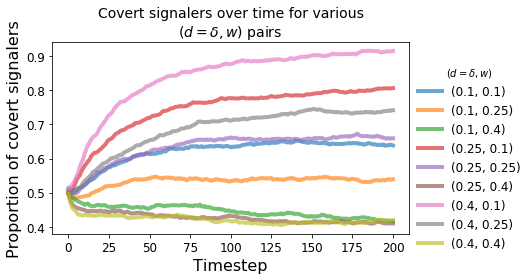

In [21]:
homophilies = [0.1, 0.25, 0.4]
dislike_penalties = [0.1, 0.25, 0.4]

df_lim = df[df.homophily.isin(homophilies) 
            & df.dislike_penalty.isin(dislike_penalties)]

gb_mean_lim = df_lim.groupby(['dislike_penalty', 'homophily', 'timestep']
                     )['prop_covert'].mean()

means_lim = gb_mean_lim.unstack(level=(0,1))

means_lim.plot(lw=4, alpha=0.65, figsize=(7.5, 4))

plt.legend(bbox_to_anchor= (1.01, 0.9), ncol=1, title='$(d=\delta, w)$',
            borderaxespad=0, frameon=False, prop={'size': 12})

plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel('Proportion of covert signalers', size=16)
plt.xlabel('Timestep', size=16)
plt.title('Covert signalers over time for various\n$(d=\delta, w)$ pairs', size=14)
plt.savefig('/Users/mt/workspace/id-sig/reports/Figures/dislikingHomophilySeries.pdf')

Wipe memory clean every round of interaction for evolution of receiving strategies.

* What happens if covert signals are perceived as overt by some fraction of $r$ fraction of receivers
* For minority groups, set one of the traits to be, e.g., 90% have -1 and 10% have +1.

In [ ]:
from id_signaling.experiment import trials_dislikepen_homophily
# XXX as of 2/18 this code below has attitude resetting after
# evolution, and code above does not.

dislike_penalty = 0.15; homophily = 0.1;
n_trials=4; n_iter=20;
demo_1 = \
    trials_dislikepen_homophily(dislike_penalty, homophily, n_trials, n_iter)

dislike_penalty = 0.40; homophily = 0.1;
# n_trials=4; n_iter=50;
demo_2 = \
    trials_dislikepen_homophily(dislike_penalty, homophily, n_trials, n_iter)

Signaling
Signaling
Receiving
Receiving
Signaling
Receiving
Signaling
Signaling
Receiving
Signaling
Signaling
Signaling
Signaling
Receiving
Signaling
Signaling
Signaling
Receiving
Signaling
Receiving
Receiving
Receiving
Signaling
Receiving
Receiving
Receiving
Signaling
Receiving
Receiving
Signaling
Receiving
Receiving
Receiving
Signaling
Signaling
Signaling
Signaling
Receiving
Signaling
Signaling
Receiving
Receiving
Receiving
Receiving
Receiving
Receiving
Receiving
Signaling
Signaling
Receiving
Signaling
Signaling
Receiving
Receiving
Receiving
Signaling
Signaling
Signaling
Signaling
Signaling
Receiving
Receiving
Receiving
Receiving
Signaling
Signaling
Receiving
Signaling
Signaling
Receiving
Receiving
Signaling
Receiving
Signaling
Receiving
Receiving
Signaling
Signaling
Signaling
Receiving
Signaling
Receiving
Signaling
Signaling
Signaling
Signaling
Signaling
Signaling
Signaling
Signaling
Receiving
Receiving
Receiving
Signaling
Receiving
Signaling
Signaling
Signaling
Receiving
Signaling


In [13]:
df_demo = pd.concat([demo_1, demo_2])

print(len(df_demo))

df_demo.head(20)

408


,timestep,trial_idx,dislike_penalty,homophily,prop_covert,prop_churlish
0,0,0,0.15,0.1,0.50,0.56
1,1,1,0.15,0.1,0.51,0.56
2,2,2,0.15,0.1,0.56,0.56
3,3,3,0.15,0.1,0.54,0.56
4,4,0,0.15,0.1,0.54,0.56
5,5,1,0.15,0.1,0.53,0.56
6,6,2,0.15,0.1,0.54,0.56
7,7,3,0.15,0.1,0.55,0.56
8,8,0,0.15,0.1,0.53,0.56
9,9,1,0.15,0.1,0.58,0.56


Text(0.5, 1.0, 'Covert signalers over time for various\n($d=\\delta$, w) pairs')

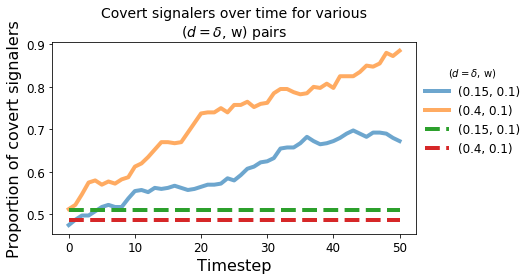

In [16]:
gb_mean = df_demo.groupby(
    ['dislike_penalty', 'homophily', 'timestep']
)['prop_covert'].mean()

covert_means = gb_mean.unstack(level=(0,1))

gb_mean = df_demo.groupby(
    ['dislike_penalty', 'homophily', 'timestep']
)['prop_churlish'].mean()

churlish_means = gb_mean.unstack(level=(0,1))

# plt.figure(figsize=(8, 4))
ax = covert_means.plot(lw=4, alpha=0.65, figsize=(7.5, 4))
churlish_means.plot(lw=4, ls='--', ax=ax)

plt.legend(bbox_to_anchor= (1.01, 0.9), ncol=1, title='($d=\delta$, w)',
            borderaxespad=0, frameon=False, prop={'size': 12})
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel('Proportion of covert signalers', size=16)
plt.xlabel('Timestep', size=16)
plt.title('Covert signalers over time for various\n($d=\delta$, w) pairs', size=14)